<a href="https://colab.research.google.com/github/koseki3104/biginner_practice202506/blob/main/%E5%8C%BB%E7%99%82%E8%B2%BB%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/SIGNATE/„Äê2025.06„ÄëÂåªÁôÇ‰øùÈô∫„ÅÆË≤ªÁî®Â∏Ø‰∫àÊ∏¨')


In [3]:
import pandas as pd
test = pd.read_csv("test.csv")
train = pd.read_csv('train.csv')

In [9]:
#Âü∫Êú¨ÊÉÖÂ†±
print(train.info())
print(train.isnull().sum())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1600 non-null   int64  
 1   age       1600 non-null   int64  
 2   sex       1600 non-null   object 
 3   bmi       1600 non-null   float64
 4   children  1600 non-null   int64  
 5   smoker    1600 non-null   object 
 6   region    1600 non-null   object 
 7   charges   1600 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 100.1+ KB
None
id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               id          age          bmi     children      charges
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000
mean   1007.86250    38.985000    32.424376     1.014375     0.306250
std     575.26841    13.555012     5.766915     1.259031     0.628656
min       0.00000    18.000000

In [8]:
#Áõ∏Èñ¢Ë°åÂàó
train_df = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = train_df.corr()
print(correlation_matrix)

                id       age       bmi  children   charges
id        1.000000  0.005803  0.039221  0.012440  0.013463
age       0.005803  1.000000  0.019885  0.011519  0.102112
bmi       0.039221  0.019885  1.000000  0.083677  0.171282
children  0.012440  0.011519  0.083677  1.000000  0.026830
charges   0.013463  0.102112  0.171282  0.026830  1.000000


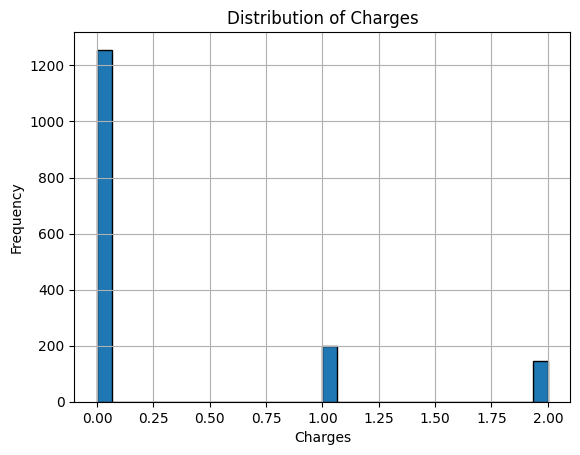

In [9]:
import matplotlib.pyplot as plt

# „Éí„Çπ„Éà„Ç∞„É©„É†„ÅÆÊèèÁîª
plt.hist(train['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 395.9/395.9 kB 12.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 242.7/242.7 kB 17.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# ‰æãÔºötrain, test „ÇíË™≠„ÅøËæº„Çì„Åß„ÅÑ„ÇãÂâçÊèê
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# üîª „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞Ôºà„Ç´„ÉÜ„Ç¥„É™Â§âÊï∞„ÇíÊï∞ÂÄ§„Å´Â§âÊèõÔºâ
categorical_cols = ['sex', 'smoker', 'region']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le  # ÂøÖË¶Å„Å™„ÇâÂæå„Åß‰Ωø„Åà„Çã„Çà„ÅÜ„Å´‰øùÂ≠ò

# üîª Ë™¨ÊòéÂ§âÊï∞„ÉªÁõÆÁöÑÂ§âÊï∞„ÅÆË®≠ÂÆö
X = train.drop(columns=['charges', 'id'])
y = train['charges']
X_test = test.drop(columns=['id'])

# üîª Â≠¶ÁøíÁî®„ÉªÊ§úË®ºÁî®„Å´ÂàÜÂâ≤
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# üîª Optuna„ÅÆÁõÆÁöÑÈñ¢Êï∞ÂÆöÁæ©
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# üîª Optuna „Åß„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# üîª ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÅßÂÜçÂ≠¶Áøí
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
})

best_model = XGBClassifier(**best_params)
best_model.fit(X, y)

# üîª „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨
y_pred_all = best_model.predict(X_test)

# üîª ÊèêÂá∫„Éï„Ç°„Ç§„É´‰ΩúÊàê
sample = pd.read_csv("sample_submit.csv")
sample['charges'] = y_pred_all
sample.to_csv('sample_submit_optuna_xgb.csv', index=False, header=False)

# üîª ÊúÄÈÅ©„Éë„É©„É°„Éº„ÇøÂá∫Âäõ
print("Best parameters found by Optuna:")
print(best_params)

[I 2025-06-27 10:19:46,056] A new study created in memory with name: no-name-7c0113a8-1866-46a4-9f96-b10c4fc7ad3b
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-27 10:19:46,885] Trial 0 finished with value: 0.89375 and parameters: {'n_estimators': 66, 'max_depth': 12, 'learning_rate': 0.11391495899906405, 'subsample': 0.6297729170571926, 'colsample_bytree': 0.8298365809333182, 'gamma': 3.6697511434796155, 'reg_alpha': 0.9245268283694896, 'reg_lambda': 3.4939665832538216}. Best is trial 0 with value: 0.89375.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-27 10:19:47,185] Trial 1 finished with value: 0.89375 and parameters: {'n_estimators': 

Best parameters found by Optuna:
{'n_estimators': 126, 'max_depth': 9, 'learning_rate': 0.08557004194809185, 'subsample': 0.6225891097234627, 'colsample_bytree': 0.8992107673213948, 'gamma': 4.309524360712768, 'reg_alpha': 4.733018221713004, 'reg_lambda': 4.709659624979591, 'random_state': 42, 'n_jobs': -1, 'use_label_encoder': False, 'eval_metric': 'mlogloss'}


In [5]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# „Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

train['sex'] = le_sex.fit_transform(train['sex'])
train['smoker'] = le_smoker.fit_transform(train['smoker'])
train['region'] = le_region.fit_transform(train['region'])

test['sex'] = le_sex.transform(test['sex'])
test['smoker'] = le_smoker.transform(test['smoker'])
test['region'] = le_region.transform(test['region'])


# Ë™¨ÊòéÂ§âÊï∞„ÉªÁõÆÁöÑÂ§âÊï∞
X = train.drop(columns=['charges', 'id'])
y = train['charges']
X_test = test.drop(columns=['id'])

# Â≠¶Áøí„ÉªÊ§úË®ºÁî®„Éá„Éº„Çø„Å´ÂàÜÂâ≤
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna „ÅÆÁõÆÁöÑÈñ¢Êï∞
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'  # Â§ö„ÇØ„É©„ÇπÂàÜÈ°ûÁî®
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Optuna „Å´„Çà„Çã„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„Åß„É¢„Éá„É´Â≠¶Áøí
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
})
best_model = XGBClassifier(**best_params)
best_model.fit(X, y)

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨
y_pred_all = best_model.predict(X_test)

# ÊèêÂá∫„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
sample = pd.read_csv("sample_submit.csv")
sample['charges'] = y_pred_all
sample.to_csv('sample_submit_optuna_xgb.csv', index=False, header=False)

# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÅÆË°®Á§∫
print("Best parameters found by Optuna:")
print(best_params)

[I 2025-06-27 10:12:44,821] A new study created in memory with name: no-name-e01ce538-b122-4d61-8ee6-706f00cc128e
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:12:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-27 10:12:46,913] Trial 0 finished with value: 0.8875 and parameters: {'n_estimators': 193, 'max_depth': 11, 'learning_rate': 0.24099446477057662, 'subsample': 0.6746631769256666, 'colsample_bytree': 0.9885521328929401, 'gamma': 0.6003892712777548, 'reg_alpha': 2.555511452114368, 'reg_lambda': 4.661649706193805}. Best is trial 0 with value: 0.8875.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:12:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-27 10:12:49,625] Trial 1 finished with value: 0.8875 and parameters: {'n_estimators': 183,

Best parameters found by Optuna:
{'n_estimators': 229, 'max_depth': 7, 'learning_rate': 0.08241451871440068, 'subsample': 0.7854605359626237, 'colsample_bytree': 0.6015061880784127, 'gamma': 0.7157379029547772, 'reg_alpha': 2.0381067000709514, 'reg_lambda': 4.649112468674556, 'random_state': 42, 'n_jobs': -1, 'use_label_encoder': False, 'eval_metric': 'mlogloss'}
